In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as plotting
%matplotlib inline

# グラフの描画


In [3]:
#与えられた方程式
def f(x):
    return x**3 - 7*x**2 + 14*x - 8 

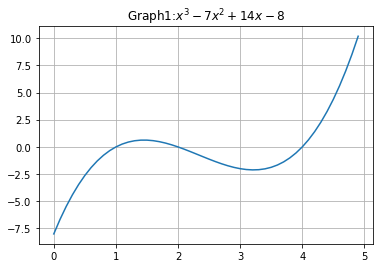

In [4]:
#初期値を決めるために描く
x = np.arange(0, 5, 0.1)
y = f(x)

ax = plt.gca()
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.title('Graph1:$x^3 - 7x^2 + 14x - 8$')

plt.plot(x, y)
plt.savefig('graph1.png')

# 非線形方程式の3つの解法

### 収束判定について
numpy.float64の場合公式ドキュメントには、以下の通り書いてある
    
    float64	Double precision float: sign bit, 11 bits exponent, 52 bits mantissa

つまり、倍精度（Double）である。
倍精度の有効数字は約15桁なので、判定には、残差、誤差両方を用いて、ゼロに最も近いであろう1.0e(-15)を用いた

### ニュートン法

In [5]:

def newtonMethod(X0):

#answerbyRE answerbyE:答え
#speedbyRE, speedbyE:収束までの回数
#rError, error
#p_error:p値のための配列

    p_error_e, p_error_re, answerbyRE, answerbyE, speedbyRE, speedbyE, rError, error  =[], [],[], [], [], [], [],[]
   
    
    for idx, x0 in enumerate(X0):
        
        p_error_e_, p_error_re_, error_, rError_ = [], [], [], []
        
        
        
        #二回使うのでコピーしておく
        x0_c = x0
        
        rError_.append(f(x0))
        x1 = (2 * (x0 ** 3) - 7*x0**2 + 8 )/(3 * (x0 ** 2 )- 14*x0 + 14)
        
        #残差によって収束判定する
        while np.abs(f(x0)) > 1.0e-14:
            x0 = x1
            #解の有効数字以上の誤差によって、解が定まらなくなっていしまうので、丸める。
            x1 = (2 * (x0 ** 3) - 7*x0**2 + 8 )/(3 * (x0 ** 2 )- 14*x0 + 14)
            p_error_re_.append(np.abs(x1))
            rError_.append(f(x0))

        p_error_re.append(p_error_re_) 
        rError.append(rError_)
        answerbyRE.append(x0)
        
        #誤差によって収束判定する
        x0 = x0_c
        x1 = (2 * (x0 ** 3) - 7*x0**2 + 8 )/(3 * (x0 ** 2 )- 14*x0 + 14)
        
        
        while np.abs(x0 - x1) > 1.0e-15:
            #解の有効数字以上の誤差によって、解が定まらなくなっていしまうので、丸める。
            x1 = x0
            x0 = (2 * (x0 ** 3) - 7*x0**2 + 8 )/(3 * (x0 ** 2 )- 14*x0 + 14)
            p_error_e_.append(np.abs(x1))
        answerbyE.append(x0)
        p_error_e.append(p_error_e_)
        

        #上で求めた解で真の値との誤差を求めるためもう一度行う。
        x0 = x0_c
        x1 = (2 * (x0 ** 3) - 7*x0**2 + 8 )/(3 * (x0 ** 2 )- 14*x0 + 14)
        
        i = 0
            
        error_.append(np.abs(x0 - answerbyE[idx]))

        while np.abs(x0 - x1) > 1.0e-15:
            #解の有効数字以上の誤差によって、解が定まらなくなっていしまうので、丸める。
            x1 = x0
            x0 = (2 * (x0 ** 3) - 7*x0**2 + 8 )/(3 * (x0 ** 2 )- 14*x0 + 14)
            error_.append(np.abs(x0 - answerbyE[idx]))
            
        error.append(error_)
        speedbyRE = [len(v) for v in rError]
        speedbyE = [len(v) for v in error]
    
    return answerbyRE, answerbyE, np.array(speedbyRE), np.array(speedbyE), rError, error, p_error_re, p_error_e

### 割線法

In [6]:
def secantMethod(X0):
    
    p_error_e, p_error_re, answerbyRE, answerbyE, speedbyRE, speedbyE, rError, error  =[], [],[], [], [], [], [],[]
    
    for idx, x0 in enumerate(X0):
        
        x1 = x0 + 0.3
        x0_c,x1_c = x0,x1

        p_error_e_, p_error_re_, error_, rError_ = [], [], [], []
        
        
        rError_.append(f(x0))
        
        #残差
        
        while np.abs(f(x0)) > 1.0e-15:
            x2 = (x0 * f(x1) - x1 * f(x0))/(f(x1) - f(x0))
            x0, x1 = x1, x2
            p_error_re_.append(np.abs(x1))
            rError_.append(f(x0))
        rError.append(rError_)
        answerbyRE.append(x0)
        p_error_re.append(p_error_re_)
        
        #誤差
        
       
        x0, x1 = x0_c, x1_c
       
        while np.abs(x1 - x0)  > 1.0e-15:
            x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
            x0, x1 = x1, x2
            p_error_e_.append(np.abs(x1))
        answerbyE.append(x0)
        p_error_e.append(p_error_e_)
            
        x0, x1 = x0_c, x1_c
    
        error_.append(np.abs(x0 - answerbyE[idx]))

        while np.abs(x1 - x0)  > 1.0e-15:
            x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
            x0, x1 = x1, x2
            error_.append(np.abs(x0 -  answerbyE[idx]))
        
        error.append(error_)
        
        speedbyRE = [len(v) for v in rError]
        speedbyE = [len(v) for v in error]
        

    return answerbyRE,answerbyE, np.array(speedbyRE), np.array(speedbyE), rError, error,  p_error_re, p_error_e

### 二分法

In [7]:
def bisectionMethod(X0, X1):
    
    p_error_e, p_error_re, answerbyRE, answerbyE, speedbyRE, speedbyE, rError, error  =[], [], [], [], [], [], [],[]
    
    for idx, (x0, x1) in enumerate(zip(X0, X1)):
        
        x0_c, x1_c = x0, x1

        x_min = x0
        x_max = x1
        x_mid = (x_min + x_max) / 2
        p_error_e_, p_error_re_, error_, rError_ = [], [], [], []
        rError_.append(f(x0))
        
        while np.abs(f(x_mid) )> 1.0e-14:
            x_mid = (x_min + x_max) / 2
            
            if f(x_max) * f(x_mid) > 0:
                x_max = x_mid 
            else:
                x_min = x_mid 
                
            if np.abs(f(x_min)) < np.abs(f(x_max)): # bが最適な値にする
                x_min, x_max = x_max, x_min
            
            p_error_re_.append(np.abs(x_mid))
            rError_.append(f(x_mid))
        
        rError.append(rError_)
        answerbyRE.append(x_mid)
        p_error_re.append(p_error_re_)
        
        x0, x1 = x0_c, x1_c
        x_min, x_max = x0, x1
        x_mid = (x_min + x_max) / 2
        
            
        
        while np.abs(x_max - x_mid) > 1.0e-15:
            
            x_mid = (x_min + x_max) / 2
            
            if f(x_max) * f(x_mid) > 0:
                x_max = x_mid 
            else:
                x_min = x_mid 
                
            if np.abs(f(x_min)) < np.abs(f(x_max)): # bが最適な値にする
                x_min, x_max = x_max, x_min
            p_error_e_.append(np.abs(x_mid)) 
        p_error_e.append(p_error_e_)
                
        answerbyE.append(x_mid)
            
        x0, x1 = x0_c, x1_c
        x_min, x_max = x0, x1
        x_mid = (x_min + x_max) / 2  
                
        error_.append(np.abs(x0 - answerbyE[idx]))


        while np.abs(x_max - x_mid) > 1.0e-15:
            x_mid = (x_min + x_max) / 2

            if f(x_max) * f(x_mid) > 0:
                x_max = x_mid 
            else:
                x_min = x_mid 

            if np.abs(f(x_min)) < np.abs(f(x_max)): # bが最適な値にする
                x_min, x_max = x_max, x_min

            error_.append(np.abs(x_mid - answerbyE[idx]))

        
        error.append(error_)
        speedbyRE = [len(v) for v in rError]
        speedbyE = [len(v) for v in error]
        
    return answerbyRE, answerbyE, np.array(speedbyRE), np.array(speedbyE), rError, error, p_error_re, p_error_e

In [8]:
#初期値を0.1 - 3.9まで0.2区切りで設定する
X0 = np.arange(0.1,4, 0.2)

#二分法の時は、二つの初期値を気を付けるようにする。いちば0.1-1.9までは、+1で
X1_a = np.arange(1.1, 3, 0.2)
X1_b = np.arange(4.1, 6.0,0.2)
X1 = np.append(X1_a,X1_b) 

NM = np.array([])
SM = np.array([])
BM = np.array([])

NM = newtonMethod(X0)
SM = secantMethod(X0)
BM  = bisectionMethod(X0, X1)

lists = [NM, SM, BM]


In [9]:
method_dic = {'Newton method':'NM', 'Secant method':'SM', 'Bisection method':'BM'}

for list, name in zip(lists, method_dic):
    print('\n\n======================={}================================================='.format(name))
    print('\n========================残差での収束判定====================================')
    print('\n解　:',np.unique(np.round(list[0], 14)),'収束回数平均:',list[2].mean())
    print('\n収束回数　一覧:', list[2])
    print('\n答え(四捨五入前)：',list[0])
    re = np.array([ np.abs(ans - np.round(ans, 14)) for ans in list[0] ])
    print('\n答えとその差の平均',re.mean())
    
    
    print('\n=======================誤差での収束判定=====================================')
    print('\n解　:',np.unique(np.round(list[1], 14)),'収束回数平均:',list[3].mean())
    print('\n収束回数　一覧:', list[3])

    print('\n答え(四捨五入前)：',list[1])
    e = np.array([ np.abs(ans - np.round(ans, 14)) for ans in list[1]])
    print('\n四捨五入前後の差の平均',e.mean())



=======================Newton method=================================================

========================残差での収束判定====================================

解　: [1. 2. 4.] 収束回数平均: 6.3

収束回数　一覧: [ 7  7  7  6  5  6  7  3  6  5  5  5  2  6 12  9 10  7  6  5]

答え(四捨五入前)： [0.9999999999999977, 0.9999999999999997, 1.0, 1.0, 0.9999999999999991, 0.9999999999999997, 0.9999999999999994, 4.0, 2.0, 2.0000000000000018, 2.0, 2.0000000000000018, 1.9999999999999984, 2.0, 0.9999999999999982, 0.9999999999999997, 4.0, 4.0, 4.0, 4.0]

答えとその差の平均 5.828670879282072e-16

=======================誤差での収束判定=====================================

解　: [1. 2. 4.] 収束回数平均: 7.65

収束回数　一覧: [ 9  8  8  7  6  7  8  4  7  7  6  7  6  7 14 10 11  8  7  6]

答え(四捨五入前)： [1.0, 0.9999999999999997, 1.0, 1.0, 1.0, 0.9999999999999997, 1.0000000000000002, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 0.9999999999999997, 4.0, 4.0, 4.0, 4.0]

四捨五入前後の差の平均 6.106226635438361e-17


=======================Secant method=============================

### P値を求める

In [10]:
def pValue(xk, alpha, i):
    alpha = round(alpha, 14)
    eps = 1.0e-13
    #リストの大きさが足りない時計算できない時は、noneが自動的に変える
    if len(xk) >= i:
        return np.log10( np.abs(xk[i - 1] - alpha  + eps) / np.abs(xk[i-2] - alpha + eps) )/ (np.log10( np.abs(xk[i-2] - alpha + eps) / np.abs(xk[i-3] - alpha  + eps)) + eps)
    

#### P値を求めるにあたって
ニュートン法と割線法のpを求める。
この二つの方法では、回数が多くても15回ほどの試行なので、十分大きいkについて行えない。また、施行の最後の方になるとlogのなかが0になったり-∞になったりするので、データ数が少なくなってしまう。
なので、すべての順番のxの組3つを使って、p値を求めどの範囲のp値が多いかを比較した。


In [11]:
p_lists = []


#p_listsに入っている順番 

# print(lists[1][7])
# print(lists[1][1])

for j in range(2):
    for k in range(len(lists)):
        p_list = []
        for i in range(3, 52):
            p_list.append([pValue(x, a , i) for x, a in zip(lists[k][j + 6], lists[k][j])])
        
        p_lists.append(p_list)
#noneを除いて数値だけにする
p_lists_num = []

for p_list in p_lists:
    p_lists_num_ = []
    for p_list_ in p_list:
        q_ = []
        for p in p_list_:        
            #noneが返っているときを除く
            if str(type(p)) == "<class 'numpy.float64'>":
                q_.append(p)
        p_lists_num_.append(q_)
    p_lists_num.append(p_lists_num_)
    
print(np.array(p_lists_num).shape) 

(6, 49)


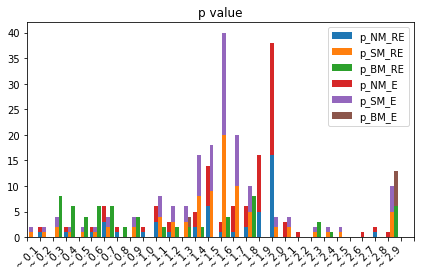

In [19]:
counts = []
x_divisions = []

#メモリ作成
divisions = np.round(np.arange(-0.5, 3.0, 0.1), 2)
x_divisions = np.append(x_divisions, [' ~ {}'.format(d) for idx, d in enumerate(divisions)], axis = 0)
x_divisions = np.append(x_divisions, ['{} ~'.format(divisions[-1])] , axis = 0)

dic = {}

#個数カウント
for p_list in p_lists_num:
    for division in divisions:
        dic[str(division)] = 0
    for  p_list_ in p_list:
        for  p in p_list_:
            if p <= -0.5:
                dic['-0.5'] += 1
            elif round(p, 1) == 0.0:
                dic['-0.0'] += 1
            elif p >= 2.9:
                dic['2.9'] += 1
            else:
                dic[str(np.round(p, 1))] += 1
    counts.append([c for c in dic.values()])
    
    
w = 0.3
cmap = ['red','blue','green','orange','lightblue','lightgreen']
labels =[ 'p_NM_RE', 'p_SM_RE','p_BM_RE', 'p_NM_E', 'p_SM_E',  'p_BM_E']



for idx, count in enumerate(counts): 
   
    count = count[6:35]
    left = np.arange(0, len(count), 1)
    
    if idx % 3== 0:
        if idx % 2 == 0:
            plt.bar(left, count, width = w,label = labels[idx])
            count0 = count
        else:
            plt.bar(left, count, bottom = count0, width = w, label = labels[idx])
    elif idx % 3 == 1:
        if idx % 2 != 0:
            count1 = count
            plt.bar(left + w, count, width = w, label = labels[idx])
        else:
            plt.bar(left + w, count, bottom = count1, width = w, label = labels[idx])
    elif idx % 3 == 2:
        if idx % 2 == 0:
            plt.bar(left + 2*w, count, width = w,label = labels[idx])
            count2 = count
        else:
            plt.bar(left + 2*w, count, bottom = count2, width = w, label = labels[idx])
            plt.legend()
# plt.xticks(np.arange(0,len(counts[0]),1), x_divisions[6:35], fontsize = 10, rotation  = 45)
plt.xticks(np.arange(0,len(counts[0]),1), x_divisions[6:35], fontsize = 10, rotation  = 45)
plt.xlim(0, 30)
plt.title('p value')
plt.tight_layout()
plt.savefig('p_valueNMSM.png')


#### p値を求めた結果　
もっともニュートン法と割線法のp値の最も多いのは、
ニュートン法は、1.9 - 2.0
割線法は、1.6 - 1.7
くらいと理論と程遠くはない値になった。
しかし、割線法は、ほとんどが
二分法は、0もしくは、-infになった。
考えられる原因は、二分法の場合、収束速度が小さく回数が多いため分母の最も最後のxkが答えに近いのが多く、logの中が0になって-infになるもしくは、分母のlogの中身の分子分母のxk+2,xk+1の値が近くになり1となってしまう可能性が高いからであると考えた。


In [13]:
def graph(i, speedbyNM, speedbySM, speedbyBM, errorbyNM, errorbySM, errorbyBM):

    x_NM = np.arange(0,speedbyNM[i], 1)
    y_NM = np.abs(errorbyNM[i])
    

    x_SM = np.arange(0,speedbySM[i], 1)
    y_SM = np.abs(errorbySM[i])
    
    x_BM = np.arange(0,speedbyBM[i], 1)
    y_BM = np.abs(errorbyBM[i])

    plt.title('initial value:{0:3.1f}'.format(X0[i]))
    plt.xlim(0,15)
    plt.plot(x_NM, y_NM, label = 'Newton Method  :{}'.format(speedbyNM[i]))
    plt.plot(x_SM, y_SM, label = 'Secant Method  :{}'.format(speedbySM[i]))
    plt.plot(x_BM, y_BM, label = 'bisectionMethod:{}'.format(speedbyBM[i]))
    plt.legend()
    plt.tight_layout()

残差と収束回数の関係


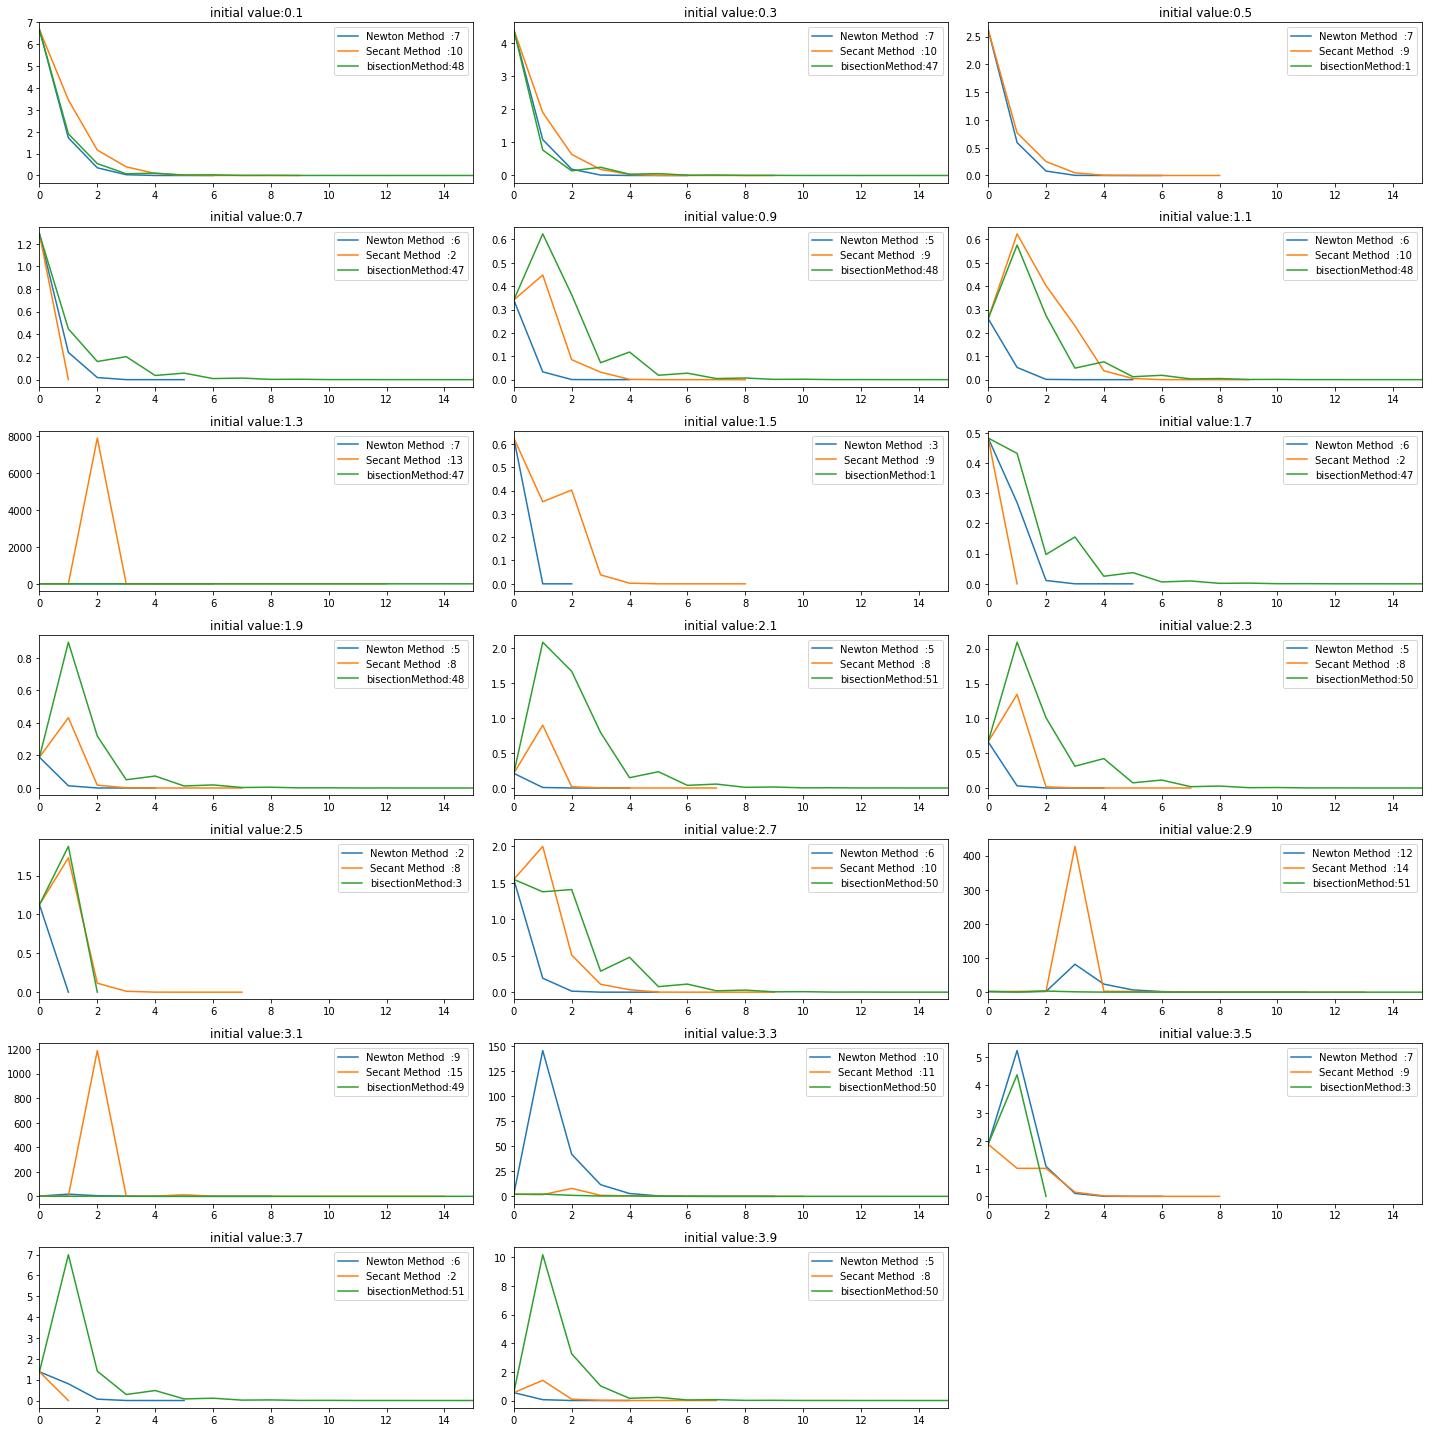

In [115]:
plt.figure(figsize = (20,20))
print('残差と収束回数の関係')
for i in range(20):
    plt.subplot(7, 3, i + 1)
    graph(i,lists[0][2], lists[1][2], lists[2][2],lists[0][4],lists[1][4],lists[2][4])
plt.savefig('graphbyRE.png')

誤差と収束回数の関係


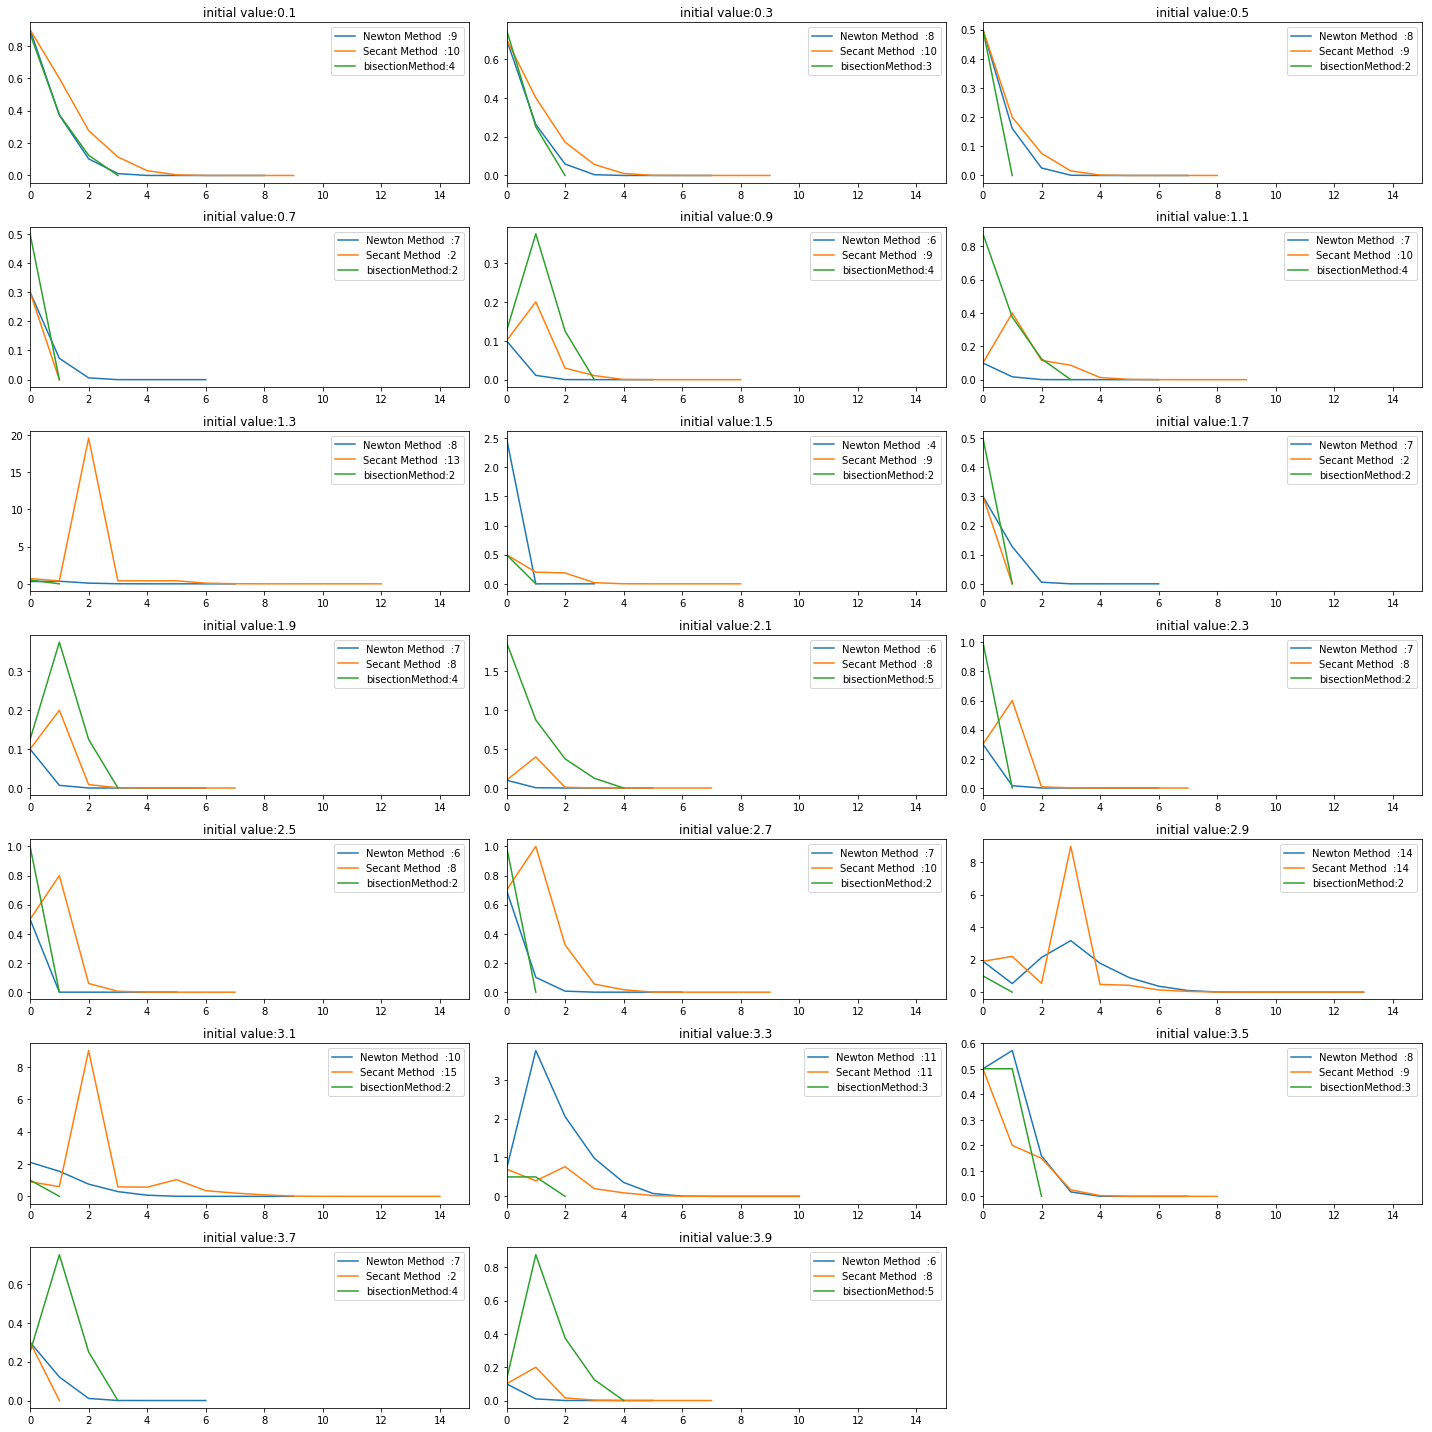

In [116]:
plt.figure(figsize = (20,20))
print('誤差と収束回数の関係')
for i in range(20):
    plt.subplot(7, 3, i + 1)
    graph(i, lists[0][3], lists[1][3], lists[2][3],lists[0][5],lists[1][5],lists[2][5])

plt.savefig('graphbyE.png')

In [117]:
pd.options.display.precision = 5
pd.options.display.float_format = '{:4.3f}'.format
pd.set_option('display.unicode.east_asian_width', True)

In [118]:
df_NM_E = pd.DataFrame(lists[0][5])
df_SM_E = pd.DataFrame(lists[1][5])
df_BM_E = pd.DataFrame(lists[2][5])
df_NM_RE = pd.DataFrame(lists[0][4])
df_SM_RE = pd.DataFrame(lists[1][4])
df_BM_RE = pd.DataFrame(lists[2][4])

In [119]:
def columns_list(len_error):
    return ['{}回'.format(i) if i != 0 else ('初期値') for i in range(len_error) ]

In [120]:

df_NM_E.columns = columns_list(len(df_NM_E.columns) )
df_SM_E.columns = columns_list(len(df_SM_E.columns) )
df_BM_E.columns = columns_list(len(df_BM_E.columns) )
df_NM_RE.columns = columns_list(len(df_NM_RE.columns) )
df_SM_RE.columns = columns_list(len(df_SM_RE.columns) )
df_BM_RE.columns = columns_list(len(df_BM_RE.columns) )

df_NM_E['初期値'] = X0
df_SM_E['初期値'] = ['{0:3.3f} {1:3.3f}'.format(x0,x0 + 0.3) for x0 in X0]
df_BM_E['初期値'] = ['{0:3.3f} {1:3.3f}'.format(x0,x1) for x0, x1 in zip(X0, X1)]
df_NM_RE['初期値'] = X0
df_SM_RE['初期値'] = ['{0:3.3f} {1:3.3f}'.format(x0,x0 + 0.3) for x0 in X0]
df_BM_RE['初期値'] = ['{0:3.3f} {1:3.3f}'.format(x0,x1) for x0, x1 in zip(X0, X1)]




df_NM_E.fillna(0.0, inplace = True)
df_SM_E.fillna(0.0, inplace = True)
df_BM_E.fillna(0.0, inplace = True)
df_NM_RE.fillna(0.0, inplace = True)
df_SM_RE.fillna(0.0, inplace = True)
df_BM_RE.fillna(0.0, inplace = True)

In [121]:
print('=========================================================================================')
print('ニュートン法')
print('===========================誤差========================================================\n',df_NM_E)
print('===========================残差========================================================\n',df_NM_RE)
print('=========================================================================================')
print('割線法')
print('===========================誤差========================================================\n',df_SM_E)
print('===========================残差========================================================\n',df_SM_RE)
print('=========================================================================================')
print('二分法')
print('===========================誤差========================================================\n',df_BM_E)
print('===========================残差========================================================\n',df_BM_RE)

ニュートン法
===========================誤差========================================================
     初期値   1回   2回   3回   4回   5回   6回   7回   8回   9回  10回  11回  \
0    0.100 0.372 0.103 0.012 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
1    0.300 0.263 0.059 0.004 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
2    0.500 0.161 0.026 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
3    0.700 0.073 0.006 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
4    0.900 0.011 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
5    1.100 0.017 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
6    1.300 0.352 0.094 0.010 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
7    1.500 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
8    1.700 0.127 0.005 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
9    1.900 0.007 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
10   2.100 0.004 0.000 0.000 0.000 0.000